In [25]:
import pandas as pd
import numpy as np

df = pd.read_csv("data-onlinePCA.txt", index_col=0)
df = df - df.mean()
df.head()

,V1,V2
1,-0.026288,0.237874
2,0.029893,1.591055
3,-0.112167,-0.429692
4,0.051487,-0.914352
5,-0.317934,1.881820


In [26]:
X = df.T.to_numpy()
N, p = X.shape
print("# Dimensions:", N)
print("# of data points:", p)

# Dimensions: 2
# of data points: 2000


In [27]:
duration = 10

## Plot data

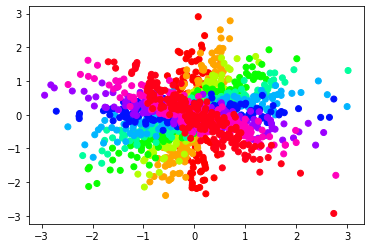

In [73]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

colors = np.repeat(np.arange(duration), p / duration)
ax.scatter(df.V1, df.V2, c=colors, cmap="hsv")

## PCs of one-second blocks

In [44]:
from numpy.linalg import eig

e_blocks = np.empty((duration, N))
M_blocks = np.empty((duration, N, N))
block_size = p // duration
for block_index in np.arange(duration):
    X_block = X[:, block_size * block_index : block_size * (block_index + 1)]
    C_block = np.cov(X_block)
    e, M = eig(C_block)
    sort_perm = e.argsort()[::-1]
    e = e[sort_perm]
    M = M[:,sort_perm]
    e_blocks[block_index] = e
    M_blocks[block_index] = M
    
print(M_blocks)

[[[ 0.01819534 -0.99983445]
  [-0.99983445 -0.01819534]]

 [[-0.25914295 -0.96583898]
  [-0.96583898  0.25914295]]

 [[-0.49561349 -0.86854319]
  [-0.86854319  0.49561349]]

 [[ 0.7165043  -0.69758267]
  [ 0.69758267  0.7165043 ]]

 [[ 0.86871041 -0.49532033]
  [ 0.49532033  0.86871041]]

 [[ 0.95820184 -0.28609306]
  [ 0.28609306  0.95820184]]

 [[ 0.99999446 -0.00332727]
  [ 0.00332727  0.99999446]]

 [[ 0.96355804  0.26749934]
  [-0.26749934  0.96355804]]

 [[ 0.87145463  0.49047612]
  [-0.49047612  0.87145463]]

 [[ 0.69654017 -0.7175178 ]
  [-0.7175178  -0.69654017]]]


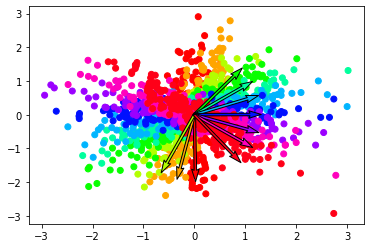

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

colors = np.repeat(np.arange(duration), p / duration)
ax.scatter(df.V1, df.V2, c=colors, cmap="hsv")

first_pcs = M_blocks[:, :, 0]
ax.quiver(np.zeros(duration), np.zeros(duration), first_pcs[:, 0], first_pcs[:, 1], np.arange(duration), scale=5, cmap="hsv", edgecolor="black", linewidth=1)

## Oja's rule

In [135]:
learning_rates = [0.002, 0.04, 0.45]

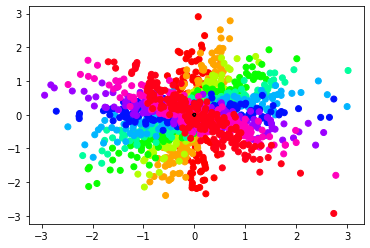

In [154]:
fig, ax = plt.subplots()

colors = np.repeat(np.arange(duration), p / duration)
ax.scatter(df.V1, df.V2, c=colors, cmap="hsv")

learning_rate = learning_rates[0]
w = np.array([0.001, 0.001])

weights = []
for x in X.T:
    y = w.T @ x
    delta_w = learning_rate * y * (x - y * w)
    w = w.copy() + delta_w
    weights.append(w)
weights = np.array(weights)

block_weights = weights[[(block_size * time) - 1 for time in np.arange(duration) + 1]].T
ax.quiver(np.zeros(duration), np.zeros(duration), block_weights[0], block_weights[1], np.arange(duration), scale=5, cmap="hsv", edgecolor="black", linewidth=1)

In [148]:
def draw_weights_for_blocks(learning_rate, ax):
    colors = np.repeat(np.arange(duration), p / duration)
    ax.scatter(df.V1, df.V2, c=colors, cmap="hsv")

    w = np.array([0.001, 0.001])

    weights = []
    for x in X.T:
        y = w.T @ x
        delta_w = learning_rate * y * (x - y * w)
        w = w.copy() + delta_w
        weights.append(w)
    weights = np.array(weights)

    block_weights = weights[[(block_size * time) - 1 for time in np.arange(duration) + 1]].T
    ax.quiver(np.zeros(duration), np.zeros(duration), block_weights[0], block_weights[1], np.arange(duration), scale=5, cmap="hsv", edgecolor="black", linewidth=1)

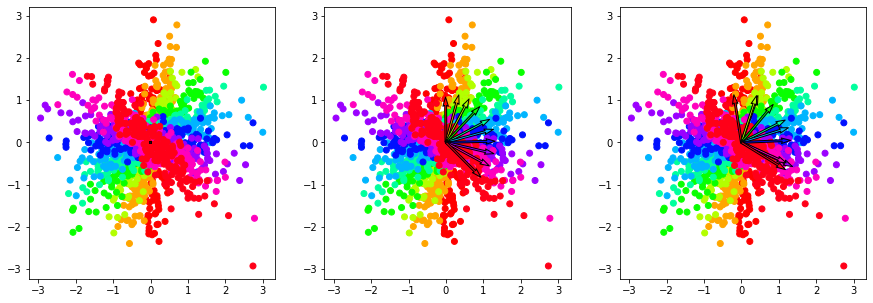

In [149]:
fig, axs = plt.subplots(ncols=len(learning_rates), figsize=(15, 5))

for lr, ax in zip(learning_rates, axs):
    draw_weights_for_blocks(lr, ax)

In [80]:
e, M = eig(np.cov(X))
sort_perm = e.argsort()[::-1]
e = e[sort_perm]
M = M[:,sort_perm]
print(M)

[[ 0.94178963 -0.33620276]
 [ 0.33620276  0.94178963]]
